In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leemos el archivo .csv
data = pd.read_csv('BD_México_sin_nulos.csv')

In [3]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   id                           26582 non-null  int64  
 2   scrape_id                    26582 non-null  float64
 3   source                       26582 non-null  object 
 4   name                         26582 non-null  object 
 5   description                  26582 non-null  object 
 6   host_id                      26582 non-null  int64  
 7   host_name                    26582 non-null  object 
 8   host_since                   26582 non-null  object 
 9   host_location                26582 non-null  object 
 10  host_response_time           26582 non-null  object 
 11  host_response_rate           26582 non-null  float64
 12  host_acceptance_rate         26582 non-null  float64
 13  host_is_superhos

In [4]:
#Creamos 2 DataFrame para poder procesar los outliers
 
cuantitativas = data.iloc[ : , [1, 2, 6, 11, 12, 14, 15, 19, 20, 23, 24, 26, 28, 29, 30, 23, 33, 34, 35, 36, 37, 38, 14, 42, 43, 44, 45, 46, 47, 50]]
cualitativas = data.iloc[ : , [3, 4, 5, 7, 8, 9, 10, 13, 16, 17, 18, 21, 22, 27, 31, 39, 40, 48, 49]]

Procedimiento "Desviación Estándar para eliminar Outliers en DataFrame

In [5]:
#Método aplicando desviacipon estándar. Encuentro los valores extremos 
y = cuantitativas

Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Limite superior permitido ", Limite_Superior)
print("Limite inferior permitido ", Limite_Inferior)

Limite superior permitido  id                             1.997574e+18
scrape_id                      2.024090e+13
host_id                        7.675833e+08
host_response_rate             1.497339e+02
host_acceptance_rate           1.561533e+00
host_listings_count            3.295566e+02
host_total_listings_count      6.148874e+02
latitude                       1.953289e+01
longitude                     -9.906674e+01
accommodates                   1.043010e+01
bathrooms                      1.046913e+02
beds                           6.956376e+00
price                          1.583067e+04
minimum_nights                 8.183006e+01
maximum_nights                 1.793887e+03
accommodates                   1.043010e+01
availability_60                9.733159e+01
availability_90                1.496068e+02
availability_365               6.026093e+02
number_of_reviews              2.711536e+02
number_of_reviews_ltm          7.505979e+01
number_of_reviews_l30d         6.823979e+00
host_

In [6]:
#Obtenemos datos y los Outliers se convierten en nulos en el DataFrame
data2 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data2

id     scrape_id    host_id  host_response_rate  \
0                    35797  2.024090e+13     153786                 NaN   
1                    44616  2.024090e+13     196253               100.0   
2                    67703  2.024090e+13     334451                71.0   
3                    70644  2.024090e+13     212109               100.0   
4                   107078  2.024090e+13     540705               100.0   
...                    ...           ...        ...                 ...   
26577  1252141718111439700  2.024090e+13   67472234               100.0   
26578  1252159821531694005  2.024090e+13  596009321               100.0   
26579  1252185591721328995  2.024090e+13  596009321               100.0   
26580  1252218347521498445  2.024090e+13  596009321               100.0   
26581  1252229157495978163  2.024090e+13    6522855               100.0   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                      0.89                  1.0                        1.0   
1                      0.93                 12.0                       13.0   
2                      0.57                  3.0                        4.0   
3                      1.00                  3.0                        4.0   
4                      1.00                  5.0                        7.0   
...                     ...                  ...                        ...   
26577                  1.00                167.0                      279.0   
26578                  1.00                 16.0                       16.0   
26579                  1.00                 16.0                       16.0   
26580                  1.00                 16.0                       16.0   
26581                  1.00                  4.0                        6.0   

        latitude  longitude  accommodates  ...  number_of_reviews_ltm  \
0      19.383820        NaN           2.0  ...                    0.0   
1      19.411620 -99.177940           NaN  ...                    0.0   
2      19.411520 -99.168570           4.0  ...                    4.0   
3      19.356140 -99.163080           2.0  ...                    7.0   
4      19.432110 -99.193270           2.0  ...                    0.0   
...          ...        ...           ...  ...                    ...   
26577  19.387329 -99.246731           4.0  ...                    0.0   
26578  19.432687 -99.197736           2.0  ...                    0.0   
26579  19.432687 -99.197736           2.0  ...                    0.0   
26580  19.432687 -99.197736           2.0  ...                    0.0   
26581  19.443476 -99.201748           2.0  ...                    0.0   

       number_of_reviews_l30d  host_listings_count  review_scores_accuracy  \
0                         0.0                  1.0                    4.56   
1                         0.0                 12.0                    4.56   
2                         0.0                  3.0                    4.81   
3                         2.0                  3.0                    4.90   
4                         0.0                  5.0                    5.00   
...                       ...                  ...                     ...   
26577                     0.0                167.0                    5.00   
26578                     0.0                 16.0                    5.00   
26579                     0.0                 16.0                    5.00   
26580                     0.0                 16.0                    5.00   
26581                     0.0                  4.0                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
0                         100.00                   4.80   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...   

In [7]:
#Corroboramos valores nulos del DataFrame
valores_nulos = data2.isnull().sum()
valores_nulos

id                                0
scrape_id                         0
host_id                           0
host_response_rate              990
host_acceptance_rate           1103
host_listings_count             304
host_total_listings_count       380
latitude                        357
longitude                       712
accommodates                    526
bathrooms                         0
beds                            466
price                            94
minimum_nights                  190
maximum_nights                    1
accommodates                    526
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews               608
number_of_reviews_ltm           432
number_of_reviews_l30d          511
host_listings_count             304
review_scores_accuracy          434
review_scores_cleanliness         0
review_scores_checkin           310
review_scores_communication     435
review_scores_location      

In [8]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"

#Realizamos una copia del DataFrame
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

id     scrape_id    host_id  host_response_rate  \
0                    35797  2.024090e+13     153786                96.9   
1                    44616  2.024090e+13     196253               100.0   
2                    67703  2.024090e+13     334451                71.0   
3                    70644  2.024090e+13     212109               100.0   
4                   107078  2.024090e+13     540705               100.0   
...                    ...           ...        ...                 ...   
26577  1252141718111439700  2.024090e+13   67472234               100.0   
26578  1252159821531694005  2.024090e+13  596009321               100.0   
26579  1252185591721328995  2.024090e+13  596009321               100.0   
26580  1252218347521498445  2.024090e+13  596009321               100.0   
26581  1252229157495978163  2.024090e+13    6522855               100.0   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                      0.89                  1.0                        1.0   
1                      0.93                 12.0                       13.0   
2                      0.57                  3.0                        4.0   
3                      1.00                  3.0                        4.0   
4                      1.00                  5.0                        7.0   
...                     ...                  ...                        ...   
26577                  1.00                167.0                      279.0   
26578                  1.00                 16.0                       16.0   
26579                  1.00                 16.0                       16.0   
26580                  1.00                 16.0                       16.0   
26581                  1.00                  4.0                        6.0   

        latitude  longitude  accommodates  ...  number_of_reviews_ltm  \
0      19.383820 -99.200000           2.0  ...                    0.0   
1      19.411620 -99.177940           3.1  ...                    0.0   
2      19.411520 -99.168570           4.0  ...                    4.0   
3      19.356140 -99.163080           2.0  ...                    7.0   
4      19.432110 -99.193270           2.0  ...                    0.0   
...          ...        ...           ...  ...                    ...   
26577  19.387329 -99.246731           4.0  ...                    0.0   
26578  19.432687 -99.197736           2.0  ...                    0.0   
26579  19.432687 -99.197736           2.0  ...                    0.0   
26580  19.432687 -99.197736           2.0  ...                    0.0   
26581  19.443476 -99.201748           2.0  ...                    0.0   

       number_of_reviews_l30d  host_listings_count  review_scores_accuracy  \
0                         0.0                  1.0                    4.56   
1                         0.0                 12.0                    4.56   
2                         0.0                  3.0                    4.81   
3                         2.0                  3.0                    4.90   
4                         0.0                  5.0                    5.00   
...                       ...                  ...                     ...   
26577                     0.0                167.0                    5.00   
26578                     0.0                 16.0                    5.00   
26579                     0.0                 16.0                    5.00   
26580                     0.0                 16.0                    5.00   
26581                     0.0                  4.0                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
0                         100.00                   4.80   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...   

<Figure size 1500x800 with 0 Axes>

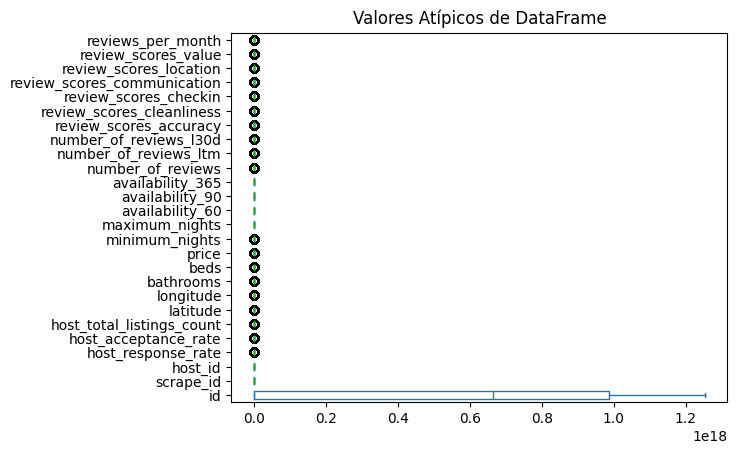

In [10]:
#Realizamos diagrama de caja o bigote de cada columna del DataFrame 
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title("Valores Atípicos de DataFrame")
plt.show()   #Dibujamos el diagrama 

In [11]:
#Convertir DataFrame a .csv
data_clean.to_csv("Datos_limpios_Mexico.csv")